In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [66]:
df=pd.read_csv('winequality-red (1).csv')


In [67]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [68]:
print(df.shape)

(1599, 12)


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [70]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [71]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

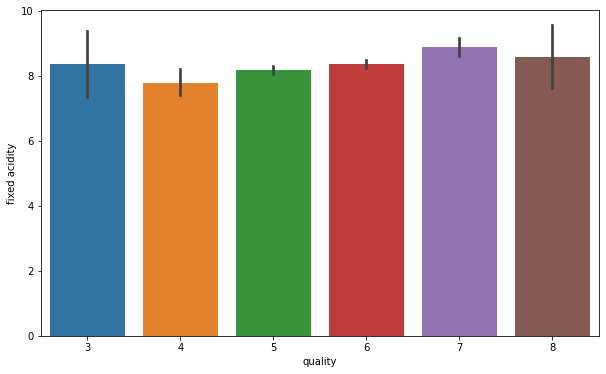

In [72]:
import seaborn as sns
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='fixed acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

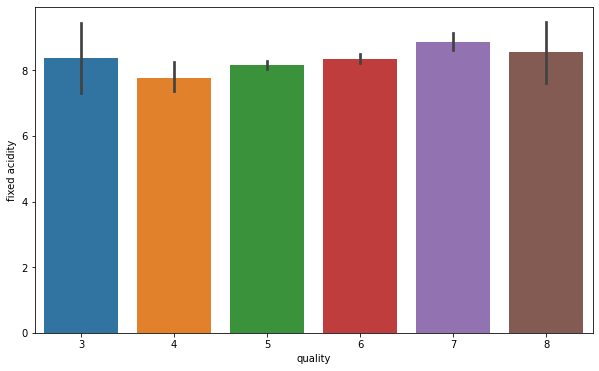

In [73]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='fixed acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

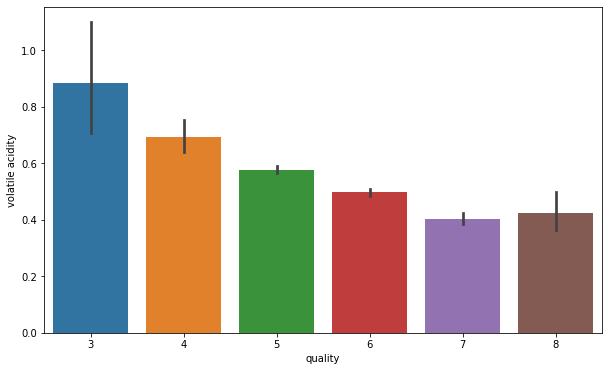

In [74]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

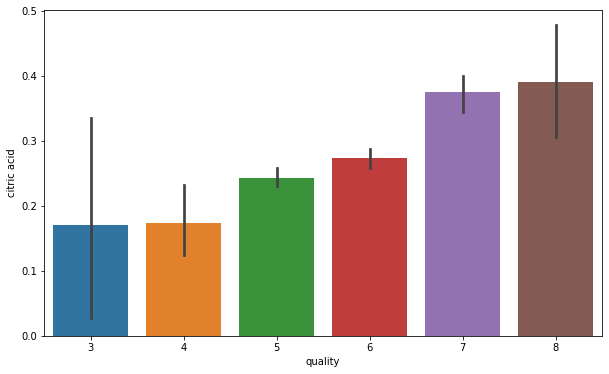

In [75]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='citric acid',data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

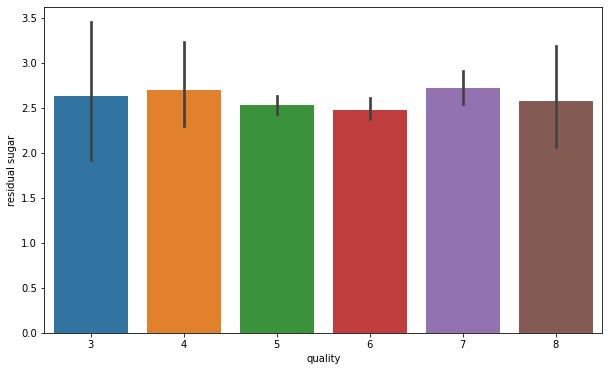

In [76]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='residual sugar',data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

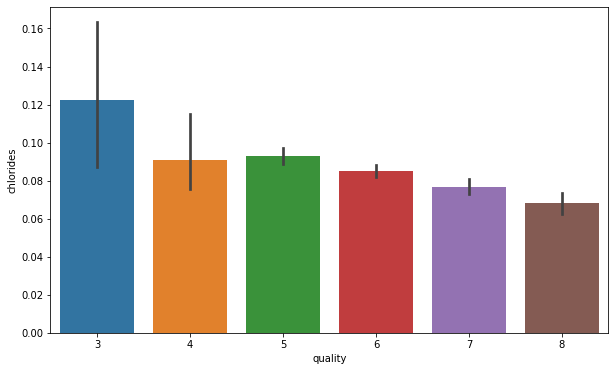

In [77]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='chlorides',data=df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

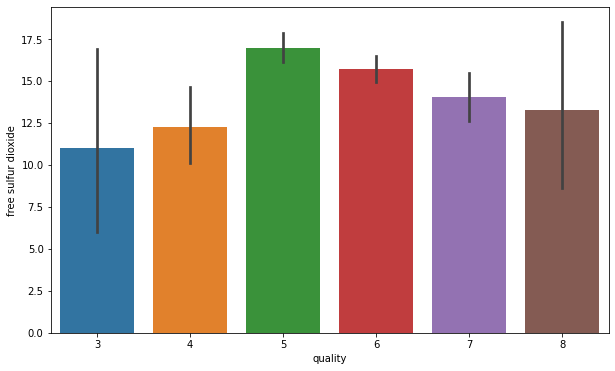

In [78]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data =df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

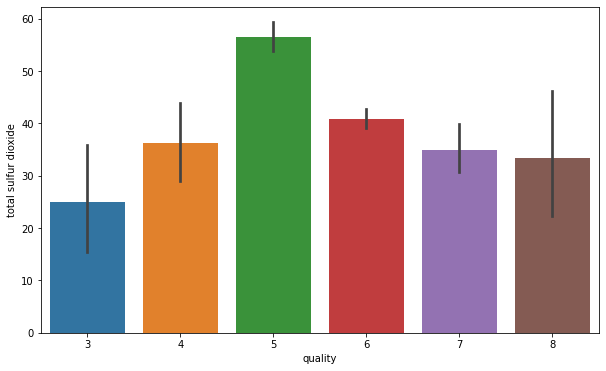

In [79]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data =df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

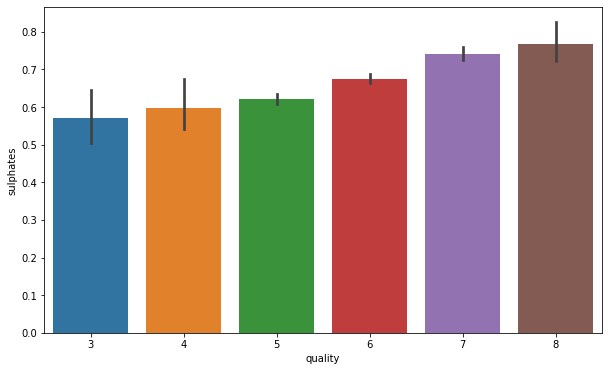

In [80]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

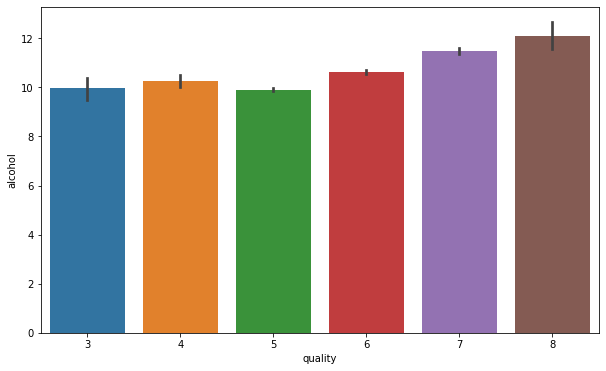

In [81]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [82]:
#processing the data
bins=[2,6.5,8]
group_names=['bad','good']
df['quality']=pd.cut(df['quality'],bins=bins, labels=group_names)

In [83]:
label_quality=LabelEncoder()

In [84]:
df['quality']=label_quality.fit_transform(df['quality'])

In [85]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

c:\users\sonal\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

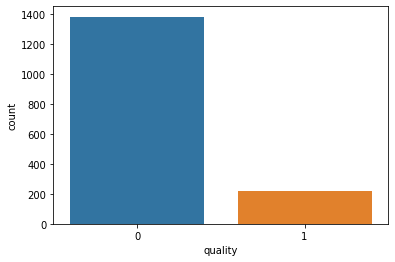

In [86]:
sns.countplot(df['quality'])

In [87]:
X=df.drop('quality', axis=1)
y=df['quality']

In [88]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [90]:
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [93]:
#RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_sc, y_train)
pred_rfc=rfc.predict(X_test_sc)

In [94]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       290
           1       0.65      0.57      0.61        30

    accuracy                           0.93       320
   macro avg       0.80      0.77      0.78       320
weighted avg       0.93      0.93      0.93       320



In [ ]:
#it gives an accuracy of 93%

In [95]:
print(confusion_matrix(y_test, pred_rfc))

[[281   9]
 [ 13  17]]


In [98]:
#SGDC classifier
sgd=SGDClassifier()
sgd.fit(X_train_sc, y_train)
pred_sgd=sgd.predict(X_test_sc)

In [99]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       290
           1       0.38      0.10      0.16        30

    accuracy                           0.90       320
   macro avg       0.64      0.54      0.55       320
weighted avg       0.86      0.90      0.87       320



In [ ]:
#SGDClassifier gives 90%accuracy

In [100]:
print(confusion_matrix(y_test, pred_sgd))

[[285   5]
 [ 27   3]]


In [101]:
#SVM
svc=SVC()
svc.fit(X_train_sc, y_train)
pred_svc=svc.predict(X_test_sc)

In [102]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       290
           1       0.64      0.30      0.41        30

    accuracy                           0.92       320
   macro avg       0.79      0.64      0.68       320
weighted avg       0.90      0.92      0.91       320



In [ ]:
#Gives 92% accuracy

In [103]:
print(confusion_matrix(y_test, pred_svc))

[[285   5]
 [ 21   9]]


In [104]:
#GridSearchCV
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train_sc, y_train)

In [ ]:
grid_svc.best_params_

In [106]:
svc2=SVC(C=1.2, gamma=0.9,kernel='rbf')

svc2.fit(X_train_sc, y_train)
pred_svc=svc2.predict(X_test_sc)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       290
           1       0.75      0.50      0.60        30

    accuracy                           0.94       320
   macro avg       0.85      0.74      0.78       320
weighted avg       0.93      0.94      0.93       320



In [ ]:
#increases accuracy to 94%

In [107]:
#cross_val_score for RandomForest and SGD
rfc_eval=cross_val_score(estimator=rfc, X=X_train_sc, y=y_train, cv=10)
rfc_eval.mean()

0.9007197342519685

In [ ]:
# 90 % accuracy